In [2]:
import os

# os.environ["KERAS_BACKEND"] = "torch"
# os.environ["KERAS_BACKEND"] = "jax"
import keras_cv

Using TensorFlow backend


In [2]:
import keras_core

ds = keras_core.utils.image_dataset_from_directory("frames/labeled_data/", image_size=(224,224))

Found 94980 files belonging to 2 classes.


2023-07-20 10:04:56.409605: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-20 10:04:56.409637: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-20 10:04:56.409645: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-20 10:04:56.409690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-20 10:04:56.409710: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
import tensorflow as tf
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE


def preprocess_inputs(image, label):
    return image, tf.one_hot(label, 2)

ds_f = (ds
      .shuffle(10 * BATCH_SIZE, reshuffle_each_iteration=True)
      .map(preprocess_inputs, num_parallel_calls=AUTOTUNE)
      .batch(BATCH_SIZE))

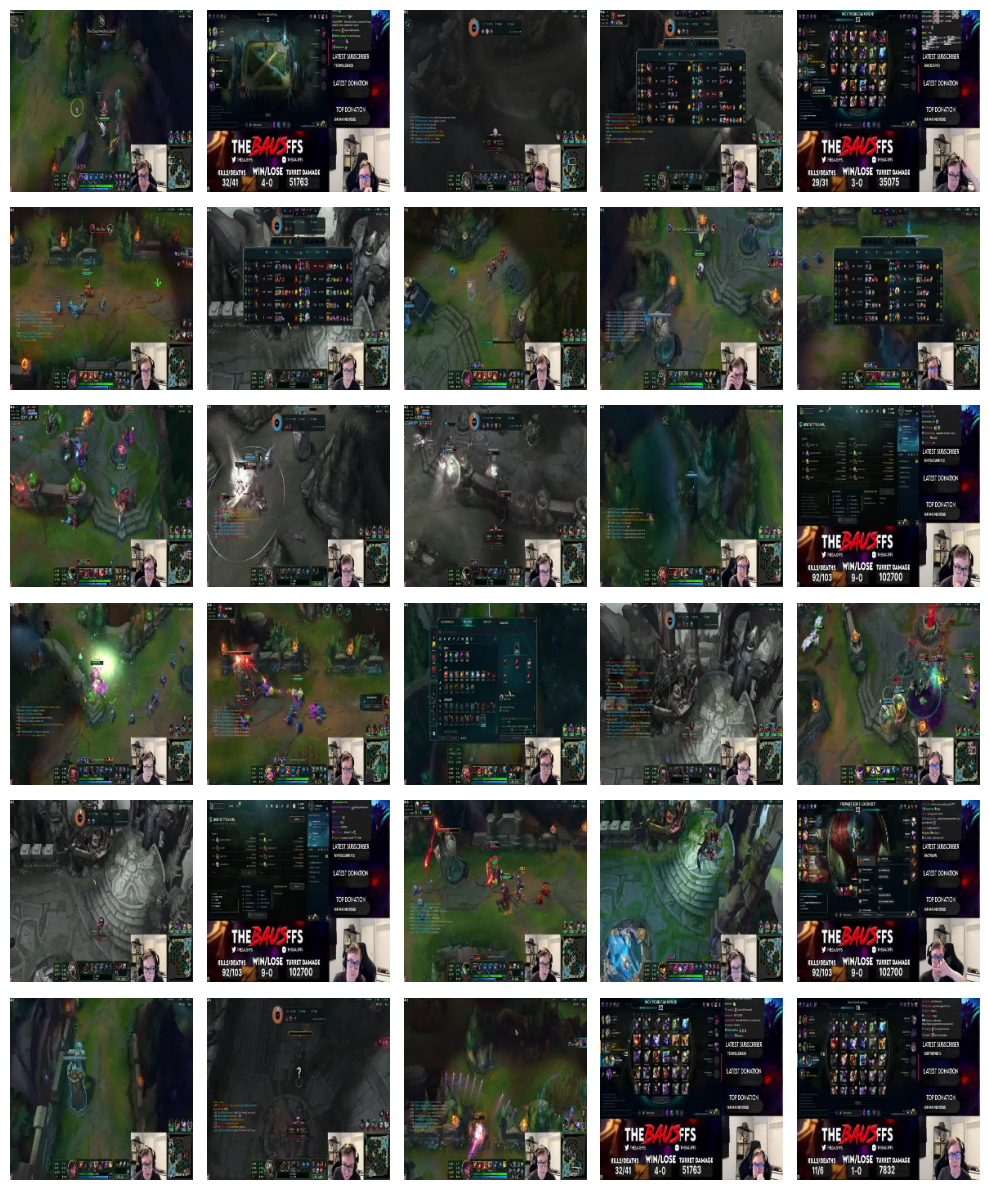

In [5]:
images = next(iter(ds.take(1)))[0]
keras_cv.visualization.plot_image_gallery(images[:3], value_range=(0, 255))

In [6]:
model = keras_cv.models.ImageClassifier.from_preset(
    "resnet18", num_classes=2
)
model.compile(
    loss=keras_core.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=[keras_core.metrics.Accuracy(), keras_core.metrics.F1Score(average="macro")],
)

In [9]:
model.fit(ds, epochs=1) # takes ~30m on 1 epoch, seems slower than fast.ai

2969/2969 [==============================] - 1079s 363ms/step - loss: 0.1115 - accuracy: 0.9560


In [10]:
model.save("model.keras")

In [1]:
model = keras_core.saving.load_model("model.keras")
model

NameError: name 'keras_core' is not defined

In [ ]:
# ~30m to run..! Slow as hell and accuracy rises very slowly